In [1]:
#Importe des fonctions utiles
import requests
import pandas as pd
import io
import collections
from itertools import combinations
import networkx as nx
pd.options.display.max_colwidth = 100
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
#Importe les fonctions pour travailler avec l'API de HAL, pour les détails, voir
# https://colab.research.google.com/github/Yquetzal/Teaching_notebooks/blob/main/Networks/cours_HAL_network.ipynb#scrollTo=d1ee2598

!wget https://raw.githubusercontent.com/Yquetzal/Teaching_notebooks/main/Networks/HALfunctions.py
from HALfunctions import get_all_elements, co_occurence_network,co_occurence_network_laboratory,column_most_common,bi_partite_network,bi_partite_network_generic

--2021-11-15 16:11:00--  https://raw.githubusercontent.com/Yquetzal/Teaching_notebooks/main/Networks/HALfunctions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6387 (6,2K) [text/plain]
Saving to: ‘HALfunctions.py.6’

HALfunctions.py.6   100%[===================>]   6,24K  --.-KB/s    in 0s      

2021-11-15 16:11:01 (19,6 MB/s) - ‘HALfunctions.py.6’ saved [6387/6387]



# Faire la requête

In [3]:
# Ici, detailler la requête.  Dans cet exemple: articles dont le résumé contient le mot "facile", 
# publiés entre 2020 et 2022, dans le domaine de l'université de Lyon.

domaine="UNIV-LYON/"
mots="abstract_t:(facile)"
dates="[2020 TO 2022]"
colonnes="title_s,authFullName_s,structAcronym_s,structCountry_s,structAddress_s,structType_s,structName_s,level1_domain_s,keyword_s"

requete = "http://api.archives-ouvertes.fr/search/"+domaine+"?q="+mots+"&fq=publicationDate_s:"+dates+"&fl="+colonnes
exemple_facile = get_all_elements(requete)
exemple_facile

Nombre d'éléments au total :  14
Éléments récupérés :  14


,title_s,authFullName_s,structAcronym_s,structCountry_s,structAddress_s,structType_s,structName_s,level1_domain_s,keyword_s
0,Co-clustering contraint pour le résumé de matrices document-terme,"Margot Selosse,Julien Jacques,Christophe Biernacki","ERIC,UL2,UCBL,MODAL,Inria,LPP,CNRS,METRICS,CHRU Lille,Polytech Lille","fr,fr,fr,fr,fr,fr,fr,fr,fr,fr,fr,fr,fr,fr,fr","Université Lumière Lyon 2 5 avenue Pierre Mendès-France 69676 Bron Cedex,86\, rue Pasteur - 6900...","laboratory,institution,institution,regroupinstitution,researchteam,laboratory,institution,labora...","Entrepôts\, Représentation et Ingénierie des Connaissances,Université Lumière - Lyon 2,Universit...",math.math-st,"Latent Block Model,Textual data,Interpretability,Interprétabilité,Donnés textuelles,Modèle des b..."
1,"Synthesis of new Covalent Triazine Frameworks for Carbon Dioxide Photoreduction,Synthèse de nouv...",Marcelo Alves Favaro,"IRCELYON,CNRS,UCBL","fr,fr,fr,fr","2 avenue Albert Einstein 69226 Villeurbanne cedex,43\, boulevard du 11 novembre 1918\, 69622 Vil...","laboratory,institution,institution,regroupinstitution","Institut de recherches sur la catalyse et l'environnement de Lyon,Centre National de la Recherch...",chim.cata,"Carbon Dioxide,Photoreduction,Covalent Triazine Framework,Catalysis,Bipyridine,Macroligand,Photo..."
2,"Unusually large ""yaw"" angle upon coordination of a new bulky unsymmetrical 3-hydroxyadamantyl-fu...","Julien Petit,Paul-Alexis Pavard,Clément Camp","C2P2,UCBL,CPE,CNRS","fr,fr,fr,fr,fr","43\, Bd. du 11 Novembre 1918\, Villeurbanne F-69616\,,43\, boulevard du 11 novembre 1918\, 69622...","laboratory,institution,regroupinstitution,institution,institution","Laboratoire de Chimie\, Catalyse\, Polymères et Procédés\, R 5265,Université Claude Bernard Lyon...",chim.coor,"Rhodium,Functional NHC ligand,Organometallic complex,Yaw distortion angle,Carbene coordination,S..."
3,Intégration de la Gestion du Contexte et des Dispositifs IoT dans des Maisons Intelligentes basé...,"Iago Felipe Trentin,Fano Ramparany,Olivier Boissier","Mines Saint-Étienne MSE,IMT,LHC,IOGS,UJM,CNRS,FAYOL-ENSMSE,Mines Saint-Étienne MSE,IMT,FAYOL-ENSMSE","fr,fr,fr,fr,fr,fr,fr,fr,fr,fr,fr","158\, Cours Fauriel - 42023 Saint Étienne cedex 2,37-39 Rue Dareau\, 75014 Paris,18 rue du Profe...","regrouplaboratory,regroupinstitution,laboratory,institution,institution,institution,laboratory,r...","École des Mines de Saint-Étienne,Institut Mines-Télécom [Paris],Laboratoire Hubert Curien [Saint...","info.info-mo,info.info-ma","Intelligence,Intelligence artificielle,Système multi-agent"
4,La production des vaches laitières Maraîchines,"Mollys Daunas,Anne Farruggia","UMRH,VAS,INRAE","fr,fr,fr,fr","INRAE / Site de Theix / 63122 Saint-Genès-Champanelle,Université de Lyon\, VetAgro Sup\, 69280 ...","laboratory,institution,institution,institution","Unité Mixte de Recherche sur les Herbivores - UMR 1213,VetAgro Sup - Institut national d'enseign...",sdv.sa,NaN
5,"Le lycée permet-il aux jeunes de comprendre l’élevage ? État des lieux et propositions,Can high ...","Alizée Chouteau,Catherine Disenhaus,Gilles Brunschwig","IDELE,PEGASE,Institut Agro,INRAE,UMRH,VAS,INRAE","fr,fr,fr,fr,fr,fr,fr,fr,fr","Paris,16\, le Clos 35590 Saint-Gilles,Institut Supérieur des Sciences Agronomiques\, Agroaliment...","institution,laboratory,institution,regroupinstitution,institution,laboratory,institution,institu...","Institut de l'élevage,Physiologie\, Environnement et Génétique pour l'Animal et les Systèmes d'E...","sdv.sa,shs.edu","Connaissance de l'élevage,Enquête,Enseignement,Lycée,Objectivité,Information"
6,Molecular engineering for the synthesis of inorganic nanomaterials for catalytic applications,S. Mishra,"CDURABLE,IRCELYON,CNRS,UCBL","fr,fr,fr,fr,fr","2 avenue Albert Einstein 69226 Villeurbanne cedex,43\, boulevard du 11 novembre 1918\, 69622 Vil...","researchteam,laboratory,institution,institution,regroupinstitution","IRCELYON-C'Durable,Institut de recherches sur la catalyse et l'environnement de L

# Créer des réseaux de co-occurence d'éléments dans les articles

In [4]:
# Un réseau dont les nœuds sont les auteurs, lien s'ils apparaissent ensemble dans le même article
g1 = co_occurence_network(exemple_facile,"authFullName_s",threshold=0)

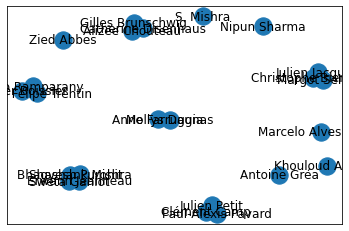

In [5]:
nx.draw_networkx(g1)

In [6]:
# Le même, avec les mots clés
g2 = co_occurence_network(exemple_facile,"keyword_s",threshold=0)

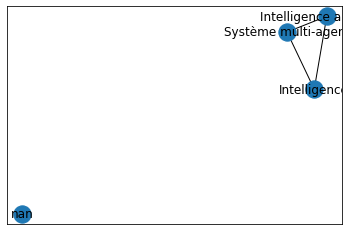

In [7]:
nx.draw_networkx(g2)

In [8]:
# Le même, avec les domaines scientifiques
g3 = co_occurence_network(exemple_facile,"level1_domain_s",threshold=0)

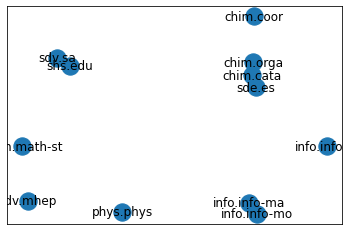

In [9]:
nx.draw_networkx(g3)

# Créer des réseaux bi-partite
Les réseaux bi-partites ont 2 types de nœuds: les articles, et un autre type de nœud que l'on peut choisir, par exemple auteur ou pays. Le lien entre un article et un autre élément (auteur, pays, etc.) veut dire qu'ils sont liés (l'auteur a écrit l'article, l'article est écrit par des personnes de ce pays, etc.)

In [10]:
# Création du réseau bi-partite auteur-article
g4 = bi_partite_network(exemple_facile,"title_s","authFullName_s",threshold=0)

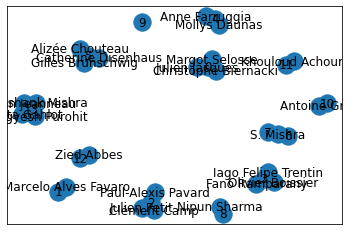

In [11]:
nx.draw_networkx(g4)

In [12]:
# Création du réseau bi-partite article-domaine
g5 = bi_partite_network(exemple_facile,"title_s","level1_domain_s",threshold=0)

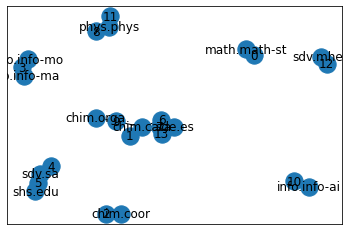

In [13]:
nx.draw_networkx(g5)

In [17]:
g6 = bi_partite_network_generic(exemple_facile,"level1_domain_s","keyword_s",threshold_max_in_col=10)


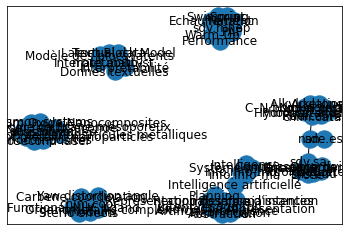

In [18]:
nx.draw_networkx(g6,)

# Export du fichier pour ouverture dans Gephi
Avec cette commande, vous enregistrez un réseau dans le répertoire courant. Si vous êtes dans Google Colab, c'est dans le panneau de gauche, il faut le rafraichir pour le voir apparaître.

In [20]:
nx.write_graphml(g1,"exemple1.graphml")
nx.write_graphml(g6,"exemple6.graphml")